<a href="https://colab.research.google.com/github/Kylehanna/Instacart-Market-Basket-Analysis/blob/main/Notebooks/03_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os 
from statsmodels.graphics.mosaicplot import mosaic
color = sns.color_palette()

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#from library.sb_utils import save_file

import warnings
warnings.filterwarnings("ignore")

In [131]:
df = pd.read_csv('/content/instacart_data.csv')

In [132]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,47901,train,14,4,6,16.0,yogurt,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,2993,train,15,0,7,7.0,yogurt,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,41425,train,4,3,8,14.0,yogurt,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,187205,train,5,4,14,30.0,yogurt,dairy eggs


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   product_id              1384617 non-null  int64  
 2   add_to_cart_order       1384617 non-null  int64  
 3   reordered               1384617 non-null  int64  
 4   product_name            1384617 non-null  object 
 5   aisle_id                1384617 non-null  int64  
 6   department_id           1384617 non-null  int64  
 7   user_id                 1384617 non-null  int64  
 8   eval_set                1384617 non-null  object 
 9   order_number            1384617 non-null  int64  
 10  order_dow               1384617 non-null  int64  
 11  order_hour_of_day       1384617 non-null  int64  
 12  days_since_prior_order  1384617 non-null  float64
 13  aisle                   1384617 non-null  object 
 14  de

In [134]:
# df = df['order_dow'].astype(object)

In [135]:
df.shape

(1384617, 15)

In [136]:
dfo = df.select_dtypes(include=['object'])

In [137]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   product_name  1384617 non-null  object
 1   eval_set      1384617 non-null  object
 2   aisle         1384617 non-null  object
 3   department    1384617 non-null  object
dtypes: object(4)
memory usage: 42.3+ MB


In [138]:
#Determine which categorical features should be transformed into indicator variables
dfo.product_name.nunique()

39123

In [139]:
dfo.aisle.nunique()

134

In [140]:
dfo.department.nunique()


21

In [141]:
#dfo = dfo['department']

In [142]:
#order_dow (Order Day of the Week (Monday, Tuesday...Sunday) is a categorical value that is represented numerically.
#dfo['user_id']= df['user_id'].astype('category') #User_id crash RAM when converted to str, keep as numeric value rn.
dfo['order_dow']= df['order_dow'].astype('str')


In [143]:
#Implementing the assumption that order_dow '0' correlates to Sunday, as beginning of the week.
dfo['order_dow'].replace({'0':'Sunday', '1':'Monday','2':'Tuesday','3':'Wednesday', '4':'Thursday', '5':'Friday', '6':'Saturday'}, inplace=True)

In [144]:
dfo.drop(columns=['eval_set','aisle','product_name'], inplace=True)

In [145]:
dfo.head()

,department,order_dow
0,dairy eggs,Thursday
1,dairy eggs,Thursday
2,dairy eggs,Sunday
3,dairy eggs,Wednesday
4,dairy eggs,Thursday


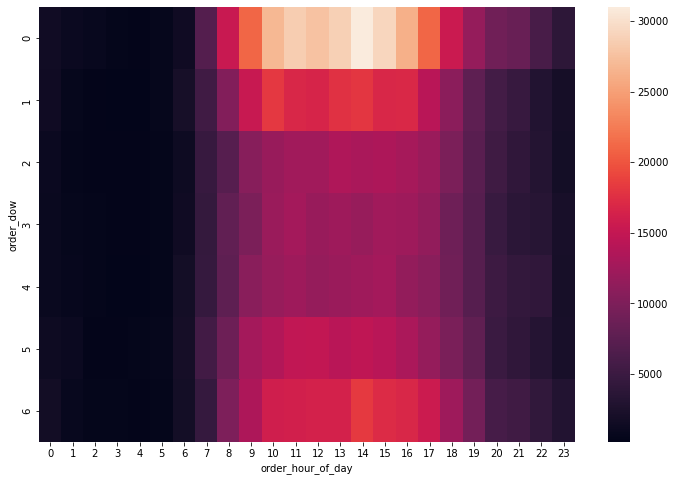

In [146]:
dow_hour_df = df.groupby(['order_dow','order_hour_of_day'])['order_number'].agg('count').reset_index()
dow_hour_df = dow_hour_df.pivot('order_dow','order_hour_of_day','order_number')

plt.figure(figsize=(12,8))
sns.heatmap(dow_hour_df)

`Department` will be the only categorical feature used in preprocessing. It has a relatively manageable count of unique variables (21). All other categorical variables have 100/1000+ nunique values. This would be exceptionally complex for this project.

In [147]:
dfo = pd.get_dummies(dfo)

In [148]:
df = pd.concat([df.drop(columns=['department', 'order_dow', 'eval_set', 'product_name'], axis=1), dfo], axis=1)

In [149]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_hour_of_day,days_since_prior_order,aisle,department_alcohol,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,department_frozen,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks,order_dow_Friday,order_dow_Monday,order_dow_Saturday,order_dow_Sunday,order_dow_Thursday,order_dow_Tuesday,order_dow_Wednesday
0,1,49302,1,1,120,16,112108,4,10,9.0,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,816049,49302,7,1,120,16,47901,14,6,16.0,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1242203,49302,1,1,120,16,2993,15,7,7.0,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1383349,49302,11,1,120,16,41425,4,8,14.0,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1787378,49302,8,0,120,16,187205,5,14,30.0,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [150]:
#Convert "Order_hour_of_day" into a datetime feature
t = pd.to_datetime(df['order_hour_of_day'], format='%H').dt.strftime('%H:%M')
t

0          10:00
1          06:00
2          07:00
3          08:00
4          14:00
           ...  
1384612    13:00
1384613    10:00
1384614    14:00
1384615    15:00
1384616    16:00
Name: order_hour_of_day, Length: 1384617, dtype: object

In [151]:
df['order_hour_of_day'] = t

In [152]:
#Response variable is categorical (Y/N)
df = df.astype({'reordered': str})

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 39 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   order_id                    1384617 non-null  int64  
 1   product_id                  1384617 non-null  int64  
 2   add_to_cart_order           1384617 non-null  int64  
 3   reordered                   1384617 non-null  object 
 4   aisle_id                    1384617 non-null  int64  
 5   department_id               1384617 non-null  int64  
 6   user_id                     1384617 non-null  int64  
 7   order_number                1384617 non-null  int64  
 8   order_hour_of_day           1384617 non-null  object 
 9   days_since_prior_order      1384617 non-null  float64
 10  aisle                       1384617 non-null  object 
 11  department_alcohol          1384617 non-null  uint8  
 12  department_babies           1384617 non-null  uint8  
 1

In [154]:
dfn = df.select_dtypes(include=['int','float64'])
dfn

,order_id,product_id,add_to_cart_order,aisle_id,department_id,user_id,order_number,days_since_prior_order
0,1,49302,1,120,16,112108,4,9.0
1,816049,49302,7,120,16,47901,14,16.0
2,1242203,49302,1,120,16,2993,15,7.0
3,1383349,49302,11,120,16,41425,4,14.0
4,1787378,49302,8,120,16,187205,5,30.0
...,...,...,...,...,...,...,...,...
1384612,1665159,41689,1,124,5,29074,10,19.0
1384613,1436874,24325,1,124,5,13457,7,6.0
1384614,2544765,21212,1,124,5,144202,6,30.0
1384615,3248198,1190,1,124,5,61549,32,7.0


Standardize numeric values due to significant difference in value range. 

In [155]:
dfn.drop(columns=['order_id','product_id','aisle_id','department_id', 'user_id'], inplace=True)
dfn

,add_to_cart_order,order_number,days_since_prior_order
0,1,4,9.0
1,7,14,16.0
2,1,15,7.0
3,11,4,14.0
4,8,5,30.0
...,...,...,...
1384612,1,10,19.0
1384613,1,7,6.0
1384614,1,6,30.0
1384615,1,32,7.0


In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(dfn)
data_scaled

array([[-1.04500451, -0.78797316, -0.77362416],
       [-0.23680765, -0.18607225, -0.1022524 ],
       [-1.04500451, -0.12588216, -0.96544467],
       ...,
       [-1.04500451, -0.66759298,  1.24049113],
       [-1.04500451,  0.89734937, -0.96544467],
       [-1.04500451, -0.78797316,  1.24049113]])

In [157]:
dfn = pd.DataFrame(data_scaled, columns=['add_to_cart_order','order_number','days_since_prior_order'])

In [158]:
df = pd.concat([df.drop(columns=['add_to_cart_order','order_number','days_since_prior_order'], axis=1), dfn], axis=1)
df

,order_id,product_id,reordered,aisle_id,department_id,user_id,order_hour_of_day,aisle,department_alcohol,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,department_frozen,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks,order_dow_Friday,order_dow_Monday,order_dow_Saturday,order_dow_Sunday,order_dow_Thursday,order_dow_Tuesday,order_dow_Wednesday,add_to_cart_order,order_number,days_since_prior_order
0,1,49302,1,120,16,112108,10:00,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1.045005,-0.787973,-0.773624
1,816049,49302,1,120,16,47901,06:00,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.236808,-0.186072,-0.102252
2,1242203,49302,1,120,16,2993,07:00,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.045005,-0.125882,-0.965445
3,1383349,49302,1,120,16,41425,08:00,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.301990,-0.787973,-0.294073
4,1787378,49302,0,120,16,187205,14:00,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.102108,-0.727783,1.240491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,1665159,41689,1,124,5,29074,13:00,spirits,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1.045005,-0.426833,0.185478
1384613,1436874,24325,1,124,5,13457,10:00,spirits,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.045005,-0.607403,-1.061355
1384614,2544765,21212,0,124,5,144202,14:00,spirits,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.045005,-0.667593,1.240491
1384615,3248198,1190,1,124,5,61549,15:00,spirits,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1.045005,0.897349,-0.965445


# Save preprocessed data in new csv

In [159]:
# save the data to a new csv file
#datapath = '../../data'
#save_file(df, 'processed.csv', datapath)

df.to_csv('processed_data.csv',index=False)